In [58]:
import boto3
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

# Load the Dataset

In [140]:
s3 = boto3.client('s3')

bucket = 'iiaweb-s3-io-practice-bucket'
file_name = '667/667200403101750.csv'
obj = s3.get_object(Bucket= bucket, Key= file_name)
df = pd.read_csv(obj['Body'])
df.head()

,Datetime,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
0,2004-03-10 17:50:06,0.0,-0.011724,0.0,1.527054,3.021150,93.5,81.5,58.5,72.0,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
1,2004-03-10 17:50:07,0.0,-0.008793,0.0,1.510575,3.004671,93.5,81.5,58.5,72.0,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
2,2004-03-10 17:50:08,0.0,0.001954,0.0,1.433673,2.933262,93.5,81.5,57.5,71.0,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
3,2004-03-10 17:50:09,0.0,-0.005862,0.0,1.208460,2.702556,93.5,81.0,57.5,71.0,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
4,2004-03-10 17:50:10,0.0,-0.000977,0.0,0.747048,2.241144,93.5,81.0,57.5,70.5,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884


In [21]:
df.tail()

,Datetime,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
4931,2004-03-10 19:12:17,0.0,0.0,0.0,0.0,0.0,197.0,194.5,171.0,293.5,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
4932,2004-03-10 19:12:18,0.0,0.0,0.0,0.0,0.0,197.0,193.5,171.0,293.0,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
4933,2004-03-10 19:12:19,0.0,0.0,0.0,0.0,0.0,197.5,193.0,170.5,292.0,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
4934,2004-03-10 19:12:20,0.0,0.0,0.0,0.0,0.0,197.5,193.0,170.5,291.0,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
4935,2004-03-10 19:12:21,0.0,0.0,0.0,0.0,0.0,197.5,193.0,170.5,290.5,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Columns: 187 entries, Datetime to ESN_2
dtypes: float64(76), int64(110), object(1)
memory usage: 7.0+ MB


## Naive Check for Point Anomalies

In [28]:
#'AOAC', 'VIB_4', EG
col = 'VIB_4'
def check_warnings(col):
    summary = df[col].agg(['mean', 'std'])
    rfloor = summary.loc['mean'] - 3*summary.loc['std']
    rceiling = summary.loc['mean'] + 3*summary.loc['std']
    warnings = df[(df[col]<=rfloor)
                 | (df[col]>=rceiling)]
    print(len(warnings))
    return warnings
warnings = check_warnings(col)
warnings.head()
# sns.distplot(df['MH'])

6


,Datetime,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
1148,2004-03-10 18:09:14,0.238388,0.237411,-0.016609,90.618027,92.101135,592.0,585.5,586.5,594.5,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
1149,2004-03-10 18:09:15,0.229595,0.226664,-0.016609,90.387314,91.875923,593.5,588.0,588.0,596.0,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
1150,2004-03-10 18:09:16,0.223733,0.222756,-0.011724,89.931396,91.419998,594.5,589.0,589.5,597.0,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
1151,2004-03-10 18:09:17,0.227641,0.224710,-0.010747,89.733650,91.222252,596.0,590.5,590.5,598.5,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884
1157,2004-03-10 18:09:23,0.204193,0.199308,-0.052758,89.865486,91.354088,600.0,596.0,596.0,602.5,...,54,7981,12971,13331,14847,13757,13640,14244,7831,7884


# Preprocessing

In [141]:
df.Datetime = pd.to_datetime(df.Datetime)
df = df.set_index('Datetime')
df.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 17:50:06,0.0,-0.011724,0.0,1.527054,3.021150,93.5,81.5,58.5,72.0,-1,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
2004-03-10 17:50:07,0.0,-0.008793,0.0,1.510575,3.004671,93.5,81.5,58.5,72.0,-1,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
2004-03-10 17:50:08,0.0,0.001954,0.0,1.433673,2.933262,93.5,81.5,57.5,71.0,3,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
2004-03-10 17:50:09,0.0,-0.005862,0.0,1.208460,2.702556,93.5,81.0,57.5,71.0,-3,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884
2004-03-10 17:50:10,0.0,-0.000977,0.0,0.747048,2.241144,93.5,81.0,57.5,70.5,1,...,54,7981,12970,13330,14846,13756,13639,14244,7831,7884


In [142]:
time = df.index
cols = df.columns

standard_scaler = preprocessing.StandardScaler()
data = standard_scaler.fit_transform(df)
df = pd.DataFrame(data)
df.index = time
df.columns = cols
df.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,DVER_2,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 17:50:06,0.006161,-0.646374,-0.008273,-0.315571,-0.323038,-3.257817,-3.754364,-3.764465,-5.611609,-0.001078,...,0.0,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0
2004-03-10 17:50:07,0.006161,-0.598338,-0.008273,-0.315778,-0.323243,-3.257817,-3.754364,-3.764465,-5.611609,-0.001078,...,0.0,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0
2004-03-10 17:50:08,0.006161,-0.422199,-0.008273,-0.316741,-0.324129,-3.257817,-3.754364,-3.773614,-5.624682,0.003271,...,0.0,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0
2004-03-10 17:50:09,0.006161,-0.550299,-0.008273,-0.319563,-0.326991,-3.257817,-3.759076,-3.773614,-5.624682,-0.003252,...,0.0,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0
2004-03-10 17:50:10,0.006161,-0.470237,-0.008273,-0.325343,-0.332716,-3.257817,-3.759076,-3.773614,-5.631218,0.001097,...,0.0,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0


## Initial Viz

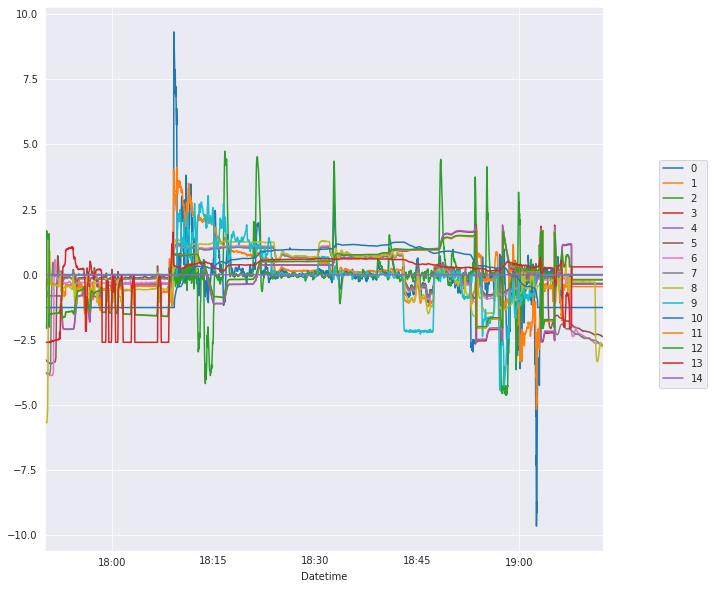

In [131]:
df[df.columns[:15]].plot(figsize=(10,10))
plt.legend(loc=(1.1,0.3))

<AxesSubplot:xlabel='Datetime'>

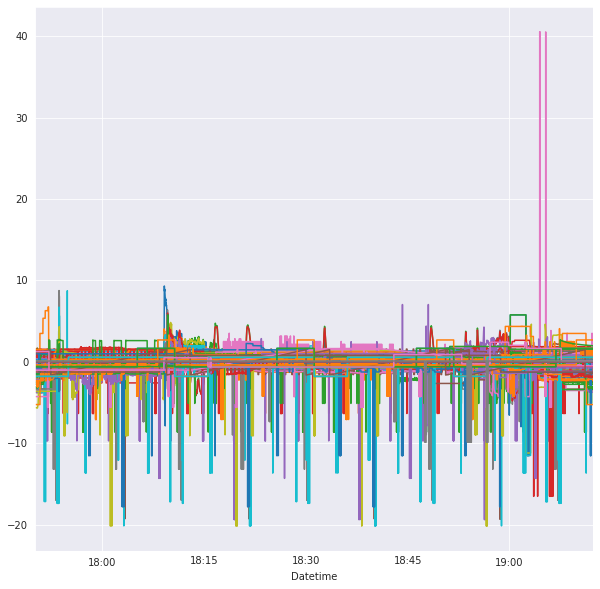

In [132]:
df.plot(figsize=(10,10), legend=None)

## Anomaly Detection V1: Clustering

In [68]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

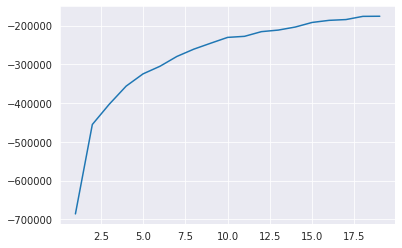

In [143]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [144]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
principal_components.shape

(4936, 2)

In [145]:
#Choosing 10 Clusters based on above plot
df['cluster'] = kmeans[9].predict(data)
df['cluster'].value_counts()

2    1642
4    1016
0     601
1     419
5     391
3     282
9     271
8     152
7     123
6      39
Name: cluster, dtype: int64

In [146]:
sns.set_style('darkgrid')

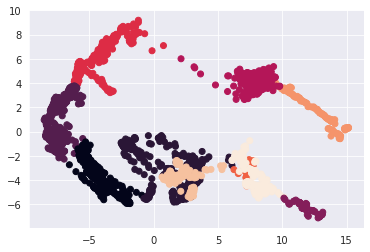

In [147]:
plt.scatter(principal_components[:,0], principal_components[:,1], c=df["cluster"])

In [148]:
df.head()

,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,ESN_3,ECYC_3,ECYC_4,EHRS_1,EHRS_4,EHRS_3,EHRS_2,ESN_1,ESN_2,cluster
Datetime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 17:50:06,0.006161,-0.646374,-0.008273,-0.315571,-0.323038,-3.257817,-3.754364,-3.764465,-5.611609,-0.001078,...,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0,7
2004-03-10 17:50:07,0.006161,-0.598338,-0.008273,-0.315778,-0.323243,-3.257817,-3.754364,-3.764465,-5.611609,-0.001078,...,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0,7
2004-03-10 17:50:08,0.006161,-0.422199,-0.008273,-0.316741,-0.324129,-3.257817,-3.754364,-3.773614,-5.624682,0.003271,...,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0,7
2004-03-10 17:50:09,0.006161,-0.550299,-0.008273,-0.319563,-0.326991,-3.257817,-3.759076,-3.773614,-5.624682,-0.003252,...,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0,7
2004-03-10 17:50:10,0.006161,-0.470237,-0.008273,-0.325343,-0.332716,-3.257817,-3.759076,-3.773614,-5.631218,0.001097,...,0.0,-1.788094,-1.788094,-0.604189,-0.37199,-0.604189,0.0,0.0,0.0,7


In [149]:
def getDistanceByPoint(d, model):
    distance = []
    for i in range(0,len(d)):
        Xa = np.array(d.iloc[i][:186])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return distance

#Arbitrary Outlier Fraction
outliers_fraction = 0.01

distance = getDistanceByPoint(df, kmeans[9])
# number_of_outliers = int(outliers_fraction*len(distance))
threshold = pd.Series(distance).quantile(q=1-outliers_fraction)

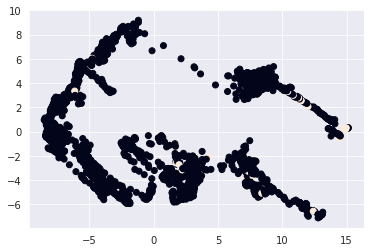

In [160]:
# anomalyCluster contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomalyCluster'] = (distance >= threshold).astype(int)
plt.scatter(principal_components[:,0], principal_components[:,1], c=df['anomalyCluster'])

### Notice the tan/peach dots above (hard to spot) which indicate outliers from the respective clusters.

In [161]:
df['anomalyCluster'].value_counts()

0    4886
1      50
Name: anomalyCluster, dtype: int64

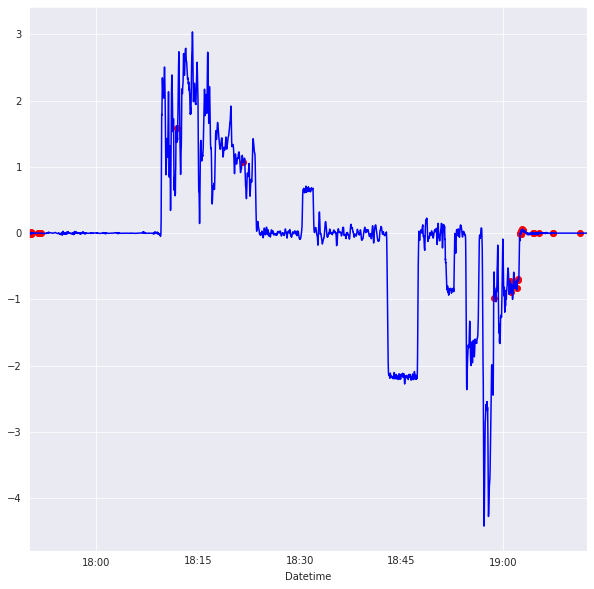

In [166]:
a = df[df['anomalyCluster'] == 1]['IVV'] #anomaly
plt.figure(figsize=(10,10))
df['IVV'].plot(color='blue')
plt.scatter(a.index, a, color='red')

## Future Work: LSTM Model Via Keras

In [ ]:
# Build the model
model = Sequential()

model.add(LSTM(
    input_shape=(x_train.shape[1], x_train.shape[-1]),
    output_dim=20,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    10,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))

model.compile(loss='mse', optimizer='rmsprop')